# **Image Classification Tourist Attraction**

# **Load Data**

### Sumber data : Google Search dan Bing Search

In [1]:
#Mount google drive untuk akses dataset kita

from google.colab import drive
drive.mount('/content/gdrive')
!ls

Mounted at /content/gdrive
gdrive	sample_data


In [2]:
%cd gdrive/My\ Drive/BANGKIT CAPSTONE/ASET WISATA DIENG/
!ls

/content/gdrive/.shortcut-targets-by-id/1d_TNzxbDIaUe1hMw8bodtnE5b1aIm8t5/ASET WISATA DIENG
 CANDI		   model_Xception_PiknikRek.h5	     TRAINING
 flagged	   model_Xception_PiknikRek.hdf5     VALIDATION
'KAWAH SIKIDANG'   model_Xception_PiknikRek.tflite
 model_tl_json	  'TELAGA WARNA'


In [3]:
#Lihat sekilas dataset nya!

import os

dir_candi = os.path.join('TRAINING/CANDI')
dir_kawah = os.path.join('TRAINING/KAWAH')
dir_telaga = os.path.join('TRAINING/TELAGA')

print('total gambar candi pada data training:', len(os.listdir(dir_candi)))
print('total gambar kawah sikidang pada data training:', len(os.listdir(dir_kawah)))
print('total gambar telaga warna pada data training:', len(os.listdir(dir_telaga)))

dir_candi_validation = os.path.join('VALIDATION/CANDI')
dir_kawah_validation = os.path.join('VALIDATION/KAWAH')
dir_telaga_validation = os.path.join('VALIDATION/TELAGA')

print('total gambar candi pada data validation:', len(os.listdir(dir_candi_validation)))
print('total gambar kawah sikidang pada data validation:', len(os.listdir(dir_kawah_validation)))
print('total gambar telaga warna pada data validation:', len(os.listdir(dir_telaga_validation)))

file2_candi = os.listdir(dir_candi)
print(file2_candi[:10])
file2_kawah = os.listdir(dir_kawah)
print(file2_kawah[:10])
file2_telaga = os.listdir(dir_telaga)
print(file2_telaga[:10])

total gambar candi pada data training: 62
total gambar kawah sikidang pada data training: 58
total gambar telaga warna pada data training: 30
total gambar candi pada data validation: 20
total gambar kawah sikidang pada data validation: 20
total gambar telaga warna pada data validation: 11
['IMG_20220518_090121.jpg', 'IMG_20220518_090250.jpg', 'IMG_20220518_090316.jpg', 'IMG_20220518_090319.jpg', 'IMG_20220518_090349.jpg', 'IMG_20220518_090426.jpg', 'IMG_20220518_090506.jpg', 'IMG_20220518_090516.jpg', 'IMG_20220518_090718.jpg', 'IMG_20220518_090750.jpg']
['IMG_20220518_112725.jpg', 'IMG_20220518_112736.jpg', 'IMG_20220518_112850.jpg', 'IMG_20220518_112910.jpg', 'IMG_20220518_112926.jpg', 'IMG_20220518_112932.jpg', 'IMG_20220518_112950.jpg', 'IMG_20220518_113000.jpg', 'IMG_20220518_113029.jpg', 'IMG_20220518_113048.jpg']
['IMG_20220518_094624.jpg', 'IMG_20220518_094650.jpg', 'IMG_20220518_094718.jpg', 'IMG_20220518_094820.jpg', 'IMG_20220518_094828.jpg', 'IMG_20220518_094859.jpg', 'IMG_

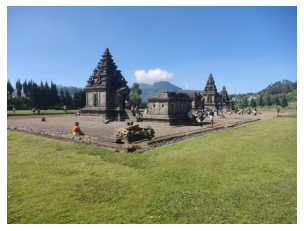

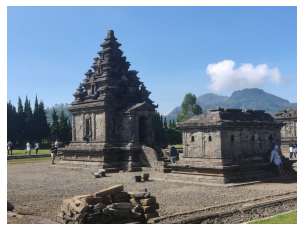

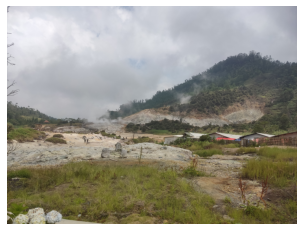

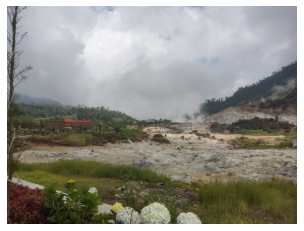

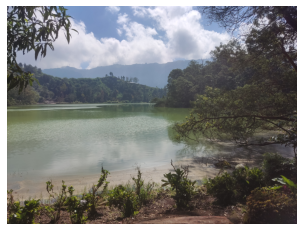

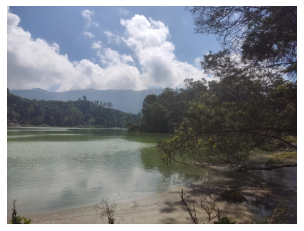

In [4]:
#Lihat gambar-gambarnya sekilas!

%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

indeks = 7

ex_candi = [os.path.join(dir_candi, fname) 
                for fname in file2_candi[indeks-2:indeks]]
ex_kawah = [os.path.join(dir_kawah, fname) 
                for fname in file2_kawah[indeks-2:indeks]]
ex_telaga = [os.path.join(dir_telaga, fname) 
                for fname in file2_telaga[indeks-2:indeks]]


for i, j in enumerate(ex_candi+ex_kawah+ex_telaga):
  gambar = mpimg.imread(j)
  plt.imshow(gambar)
  plt.axis('Off')
  plt.show()

# **Model CNN Biasa u/ Image Classification**

In [5]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

In [6]:
#Mulai buat model nya!

dir_training = "TRAINING/"

trainingdata = ImageDataGenerator(
      rescale = 1.0/255.,
	    rotation_range=30,
      width_shift_range=0.1,
      height_shift_range=0.1,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      vertical_flip=True,
      fill_mode='nearest')

generator_training = trainingdata.flow_from_directory(
	dir_training,
	target_size=(224,224),
	class_mode='categorical'
)

dir_validation = "VALIDATION/"

validationdata = ImageDataGenerator(rescale = 1.0/255.)

generator_validation = validationdata.flow_from_directory(
	dir_validation,
	target_size=(224,224),
	class_mode='categorical'
)

model_lokasi = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model_lokasi.summary()

Found 149 images belonging to 3 classes.
Found 50 images belonging to 3 classes.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 64)      1792      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 128)       73856     
                                         

In [7]:
labels = generator_training.class_indices.keys()

In [8]:
#Latih model tersebut dan ukur seberapa baik modelnya!

model_lokasi.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

performa = model_lokasi.fit(generator_training, epochs=10, validation_data = generator_validation, verbose = 1)

Epoch 1/10
5/5 [==============================] - 112s 24s/step - loss: 3.3454 - accuracy: 0.4027 - val_loss: 1.0575 - val_accuracy: 0.5600
Epoch 2/10
5/5 [==============================] - 49s 9s/step - loss: 1.0720 - accuracy: 0.4094 - val_loss: 1.0421 - val_accuracy: 0.4000
Epoch 3/10
5/5 [==============================] - 49s 10s/step - loss: 1.0564 - accuracy: 0.3960 - val_loss: 0.9762 - val_accuracy: 0.6200
Epoch 4/10
5/5 [==============================] - 49s 10s/step - loss: 0.9666 - accuracy: 0.5839 - val_loss: 0.9189 - val_accuracy: 0.5600
Epoch 5/10
5/5 [==============================] - 49s 9s/step - loss: 1.0124 - accuracy: 0.5034 - val_loss: 1.0489 - val_accuracy: 0.4800
Epoch 6/10
5/5 [==============================] - 49s 10s/step - loss: 0.9462 - accuracy: 0.5638 - val_loss: 0.9671 - val_accuracy: 0.4600
Epoch 7/10
5/5 [==============================] - 51s 10s/step - loss: 0.8928 - accuracy: 0.6107 - val_loss: 0.8155 - val_accuracy: 0.7600
Epoch 8/10
5/5 [============

# **Transfer Learning Xception**

In [9]:
#Gunakan bantuan dari Xception pre-trained model

from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dropout, Dense
from tensorflow.keras.optimizers import Adam

#Import model dasar pre-trained Xception
model_dasar_Xception = Xception(weights='imagenet', input_shape = (224,224,3), include_top=False, pooling = 'avg')

#Output model dasar
x = model_dasar_Xception.output

#Input ke DNN data kita
x = Dropout(0.2)(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(32, activation='relu')(x)
prediksi = Dense(3, activation='softmax')(x)

#Model akhir yang akan dilatih
model_tl = Model(inputs=model_dasar_Xception.input, outputs=prediksi)

#Freeze semua layer pada Xception
for layer in model_dasar_Xception.layers:
    layer.trainable = False

#Sambungan model akhir
model_tl.summary()

#Compile modelnya
model_tl.compile(optimizer='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

#Latih model tsb
model_tl.fit(generator_training, epochs=8, validation_data = generator_validation, verbose = 1)

83697664/83683744 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                      

In [10]:
#Visualisasikan semua layer model Xception
for i, layer in enumerate(model_dasar_Xception.layers):
    print(i, layer.name)

0 input_1
1 block1_conv1
2 block1_conv1_bn
3 block1_conv1_act
4 block1_conv2
5 block1_conv2_bn
6 block1_conv2_act
7 block2_sepconv1
8 block2_sepconv1_bn
9 block2_sepconv2_act
10 block2_sepconv2
11 block2_sepconv2_bn
12 conv2d_3
13 block2_pool
14 batch_normalization
15 add
16 block3_sepconv1_act
17 block3_sepconv1
18 block3_sepconv1_bn
19 block3_sepconv2_act
20 block3_sepconv2
21 block3_sepconv2_bn
22 conv2d_4
23 block3_pool
24 batch_normalization_1
25 add_1
26 block4_sepconv1_act
27 block4_sepconv1
28 block4_sepconv1_bn
29 block4_sepconv2_act
30 block4_sepconv2
31 block4_sepconv2_bn
32 conv2d_5
33 block4_pool
34 batch_normalization_2
35 add_2
36 block5_sepconv1_act
37 block5_sepconv1
38 block5_sepconv1_bn
39 block5_sepconv2_act
40 block5_sepconv2
41 block5_sepconv2_bn
42 block5_sepconv3_act
43 block5_sepconv3
44 block5_sepconv3_bn
45 add_3
46 block6_sepconv1_act
47 block6_sepconv1
48 block6_sepconv1_bn
49 block6_sepconv2_act
50 block6_sepconv2
51 block6_sepconv2_bn
52 block6_sepconv3_a

In [11]:
#Freeze 100 layer pertama dan Unfreeze layer sisanya (setelah di freeze)

class MyThresholdCallback(tf.keras.callbacks.Callback):
  def __init__(self, threshold):
    super(MyThresholdCallback, self).__init__()
    self.threshold = threshold

  def on_epoch_end(self, epoch, logs=None): 
    val_accuracy = logs["val_accuracy"]
    train_accuracy = logs["accuracy"]
    if val_accuracy > self.threshold and train_accuracy > self.threshold:
      self.model.stop_training = True

callbacks = MyThresholdCallback(threshold=0.92)

for layer in model_tl.layers[:100]:
    layer.trainable = False
for layer in model_tl.layers[100:]:
    layer.trainable = True

#Fine tuning (nilai lr kecil)
optimizer = Adam(learning_rate=0.001,
                 decay = 1e-11,
                 beta_1=0.8,
                 beta_2=0.999,
                 amsgrad=False)

#Recompile model hasil unfreeze
model_tl.compile(optimizer=optimizer,
                 loss='categorical_crossentropy',
                 metrics = ['accuracy'])

#Ringkasan model hasil unfreeze
model_tl.summary()

performa_tl = model_tl.fit(generator_training,
                           callbacks = [callbacks],
                           epochs=50,
                           validation_data = generator_validation,
                           verbose = 1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 block1_conv1 (Conv2D)          (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 block1_conv1_bn (BatchNormaliz  (None, 111, 111, 32  128        ['block1_conv1[0][0]']           
 ation)                         )                                                             

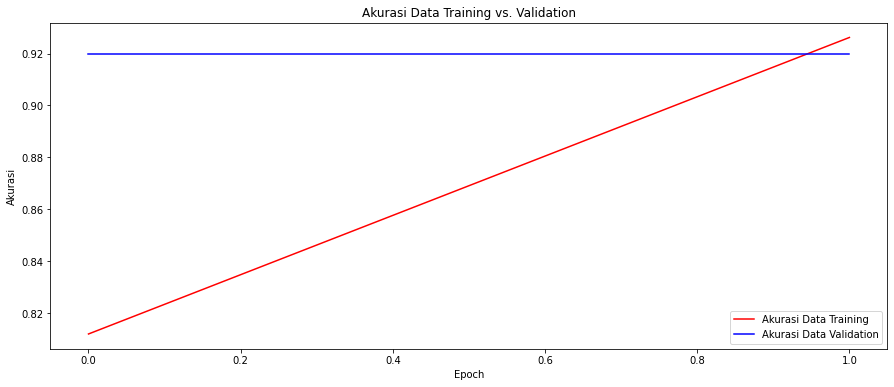

<Figure size 432x288 with 0 Axes>

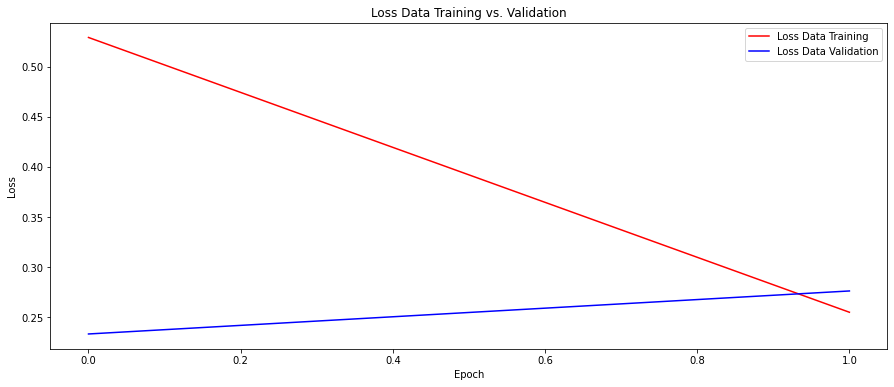

<Figure size 432x288 with 0 Axes>

In [12]:
#Plot akurasi data training dan data validation

import matplotlib.pyplot as plt
plt.figure(figsize=(15, 6))

accuracy = performa_tl.history['accuracy']
val_accuracy = performa_tl.history['val_accuracy']
loss = performa_tl.history['loss']
val_loss = performa_tl.history['val_loss']

epochs = range(len(accuracy))

#Plot akurasi
plt.plot(epochs, accuracy, 'r', label='Akurasi Data Training')
plt.plot(epochs, val_accuracy, 'b', label='Akurasi Data Validation')
plt.title('Akurasi Data Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Akurasi')
plt.legend(loc=0)
plt.figure()
plt.show()

#Plot loss
plt.figure(figsize=(15, 6))
plt.plot(epochs, loss, 'r', label='Loss Data Training')
plt.plot(epochs, val_loss, 'b', label='Loss Data Validation')
plt.title('Loss Data Training vs. Validation')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
#Prediksi gambar baru

import numpy as np
from google.colab import files
from tensorflow.keras.applications.xception import preprocess_input

labels = generator_training.class_indices.keys()

gambar_baru = files.upload()

for fn in gambar_baru.keys():
 
  #prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(224, 224))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  images = np.vstack([x])
  proba = model_tl.predict(images)[0]
  plt.imshow(img)
  plt.show()
  for (label, p) in zip(labels, proba):
    print("{}: {:.2f}%".format(label, p * 100))
    print(proba)

In [14]:
#Simpan model akhir
model_tl.save("model_Xception_PiknikRek.h5")
tf.keras.models.save_model(model_tl,'model_Xception_PiknikRek.hdf5')

In [15]:
#Convert ke TF Lite
import tensorflow as tf

#Load model yang telah disimpah
model_akhir = tf.keras.models.load_model(filepath="model_Xception_PiknikRek.h5")

#Convert model tsb ke bentuk TF Lite
konversi = tf.lite.TFLiteConverter.from_keras_model(model_akhir)
model_tflite = konversi.convert()

#Simpan TF Lite model.
with tf.io.gfile.GFile('model_Xception_PiknikRek.tflite', 'wb') as f:
  f.write(model_tflite)

INFO:tensorflow:Assets written to: /tmp/tmphaavwvs3/assets


In [16]:
#Simpan juga model akhir dalam bentuk json

model_tl_json = model_tl.to_json()
with open("model_tl_json", "w") as file_json:
    file_json.write(model_tl_json)

# Deployment with Gradio

In [17]:
!pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.1 MB 7.4 MB/s 
     |████████████████████████████████| 1.1 MB 48.9 MB/s 
     |████████████████████████████████| 2.0 MB 47.8 MB/s 
     |████████████████████████████████| 53 kB 2.6 MB/s 
     |████████████████████████████████| 54 kB 3.7 MB/s 
     |████████████████████████████████| 212 kB 49.7 MB/s 
     |████████████████████████████████| 253 kB 57.1 MB/s 
     |████████████████████████████████| 84 kB 4.0 MB/s 
     |████████████████████████████████| 271 kB 61.4 MB/s 
     |████████████████████████████████| 144 kB 57.1 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
     |████████████████████████████████| 63 kB 2.2 MB/s 
     |████████████████████████████████| 11.1 MB 33.9 MB/s 
     |████████████████████████████████| 80 kB 10.2 MB/s 
     |████████████████████████████████| 43 kB 2.6 MB/s 
     |████████████████████████████████| 856 

In [18]:
import gradio as gr
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from tensorflow import keras

In [19]:
def predict_image(img):
  img_4d=img.reshape(-1,224,224,3)
  prediksi=model_tl.predict(img_4d)[0]
  class_names = ['candi', 'kawah sikidang', 'telaga warna']
  return {class_names[i]: float(prediksi[i]) for i in range(3)}

In [ ]:
image = gr.inputs.Image(shape=(224,224), image_mode='RGB', invert_colors=False, source="upload")
label = gr.outputs.Label(num_top_classes=3)

gr.Interface(fn=predict_image, inputs=image, outputs=label, interpretation='default').launch(debug='True')

/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.7/dist-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
  warnings.warn(value)


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://48089.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces (https://huggingface.co/spaces)
